In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Flight_Booking.csv')
df.shape

(300153, 12)

In [8]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [14]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


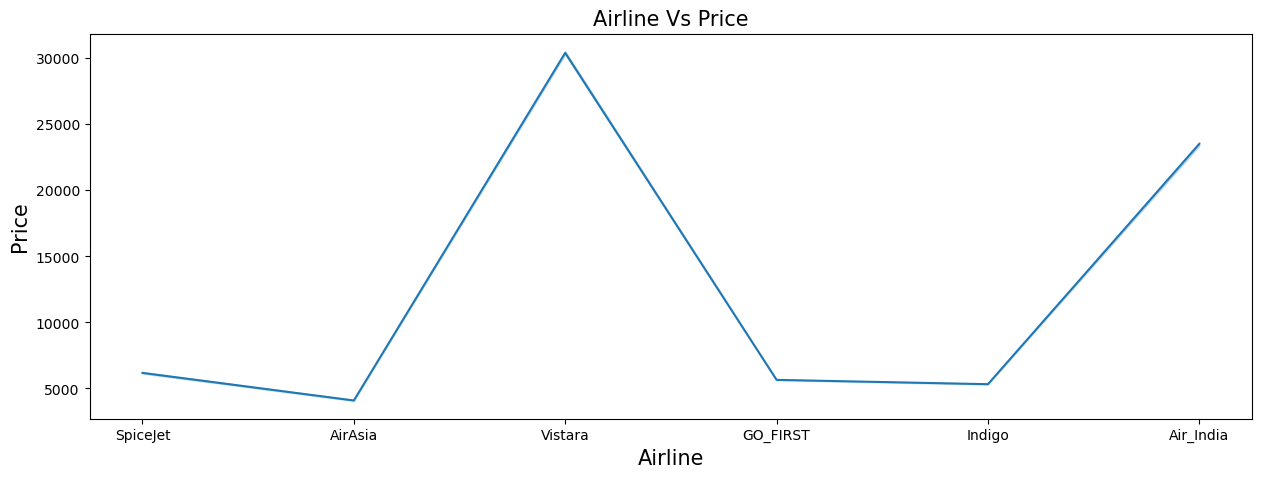

In [17]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airline Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

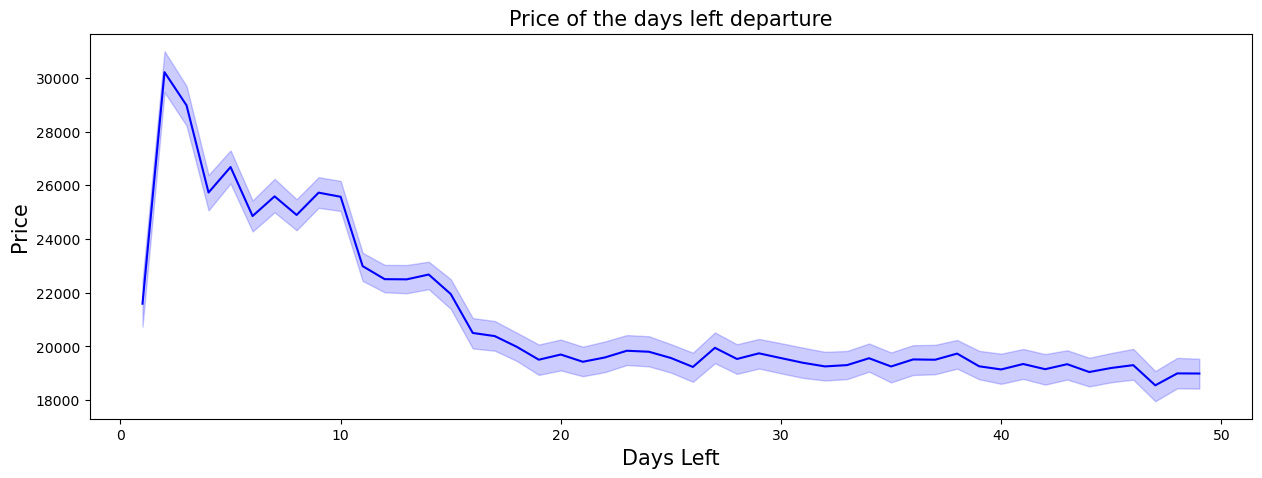

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'], y=df['price'], color='blue')
plt.title('Price of the days left departure', fontsize=15)
plt.xlabel('Days Left', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

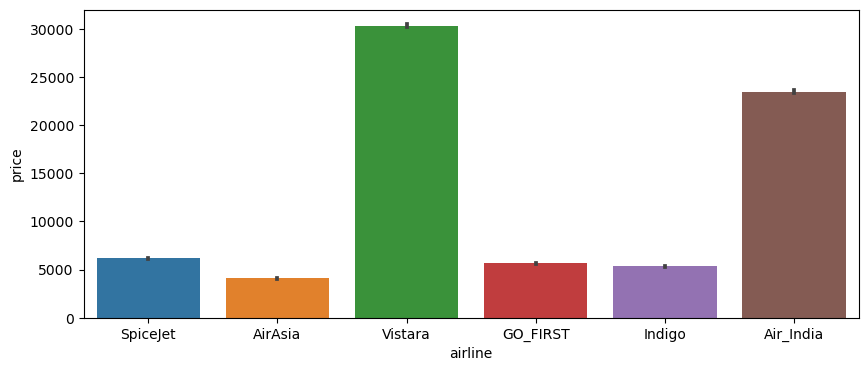

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['airline'], y=df['price'])
plt.show()

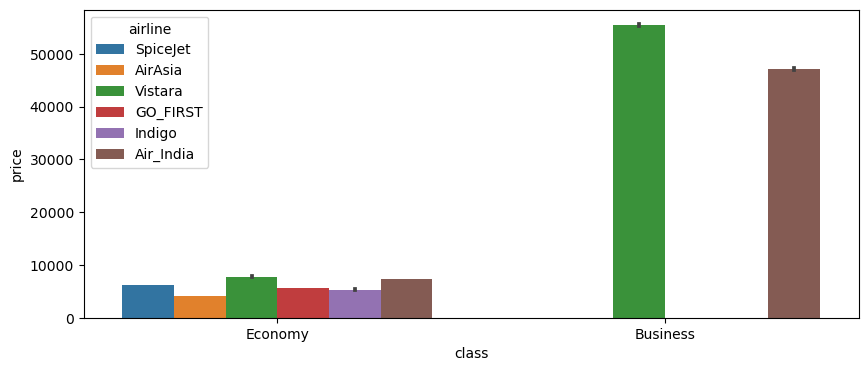

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['class'], y=df['price'], hue=df['airline'])
plt.show()

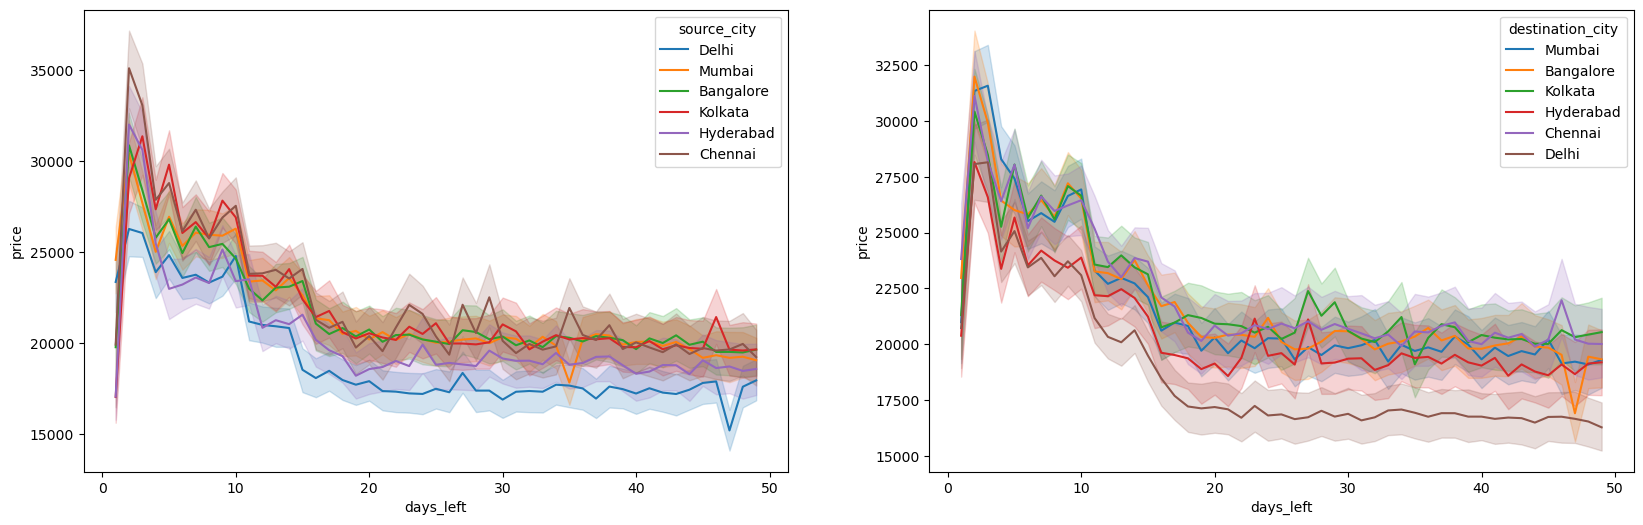

In [24]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x=df['days_left'], y=df['price'], hue=df['source_city'], ax=ax[0])
sns.lineplot(x=df['days_left'], y=df['price'], hue=df['destination_city'], ax=ax[1])
plt.show()

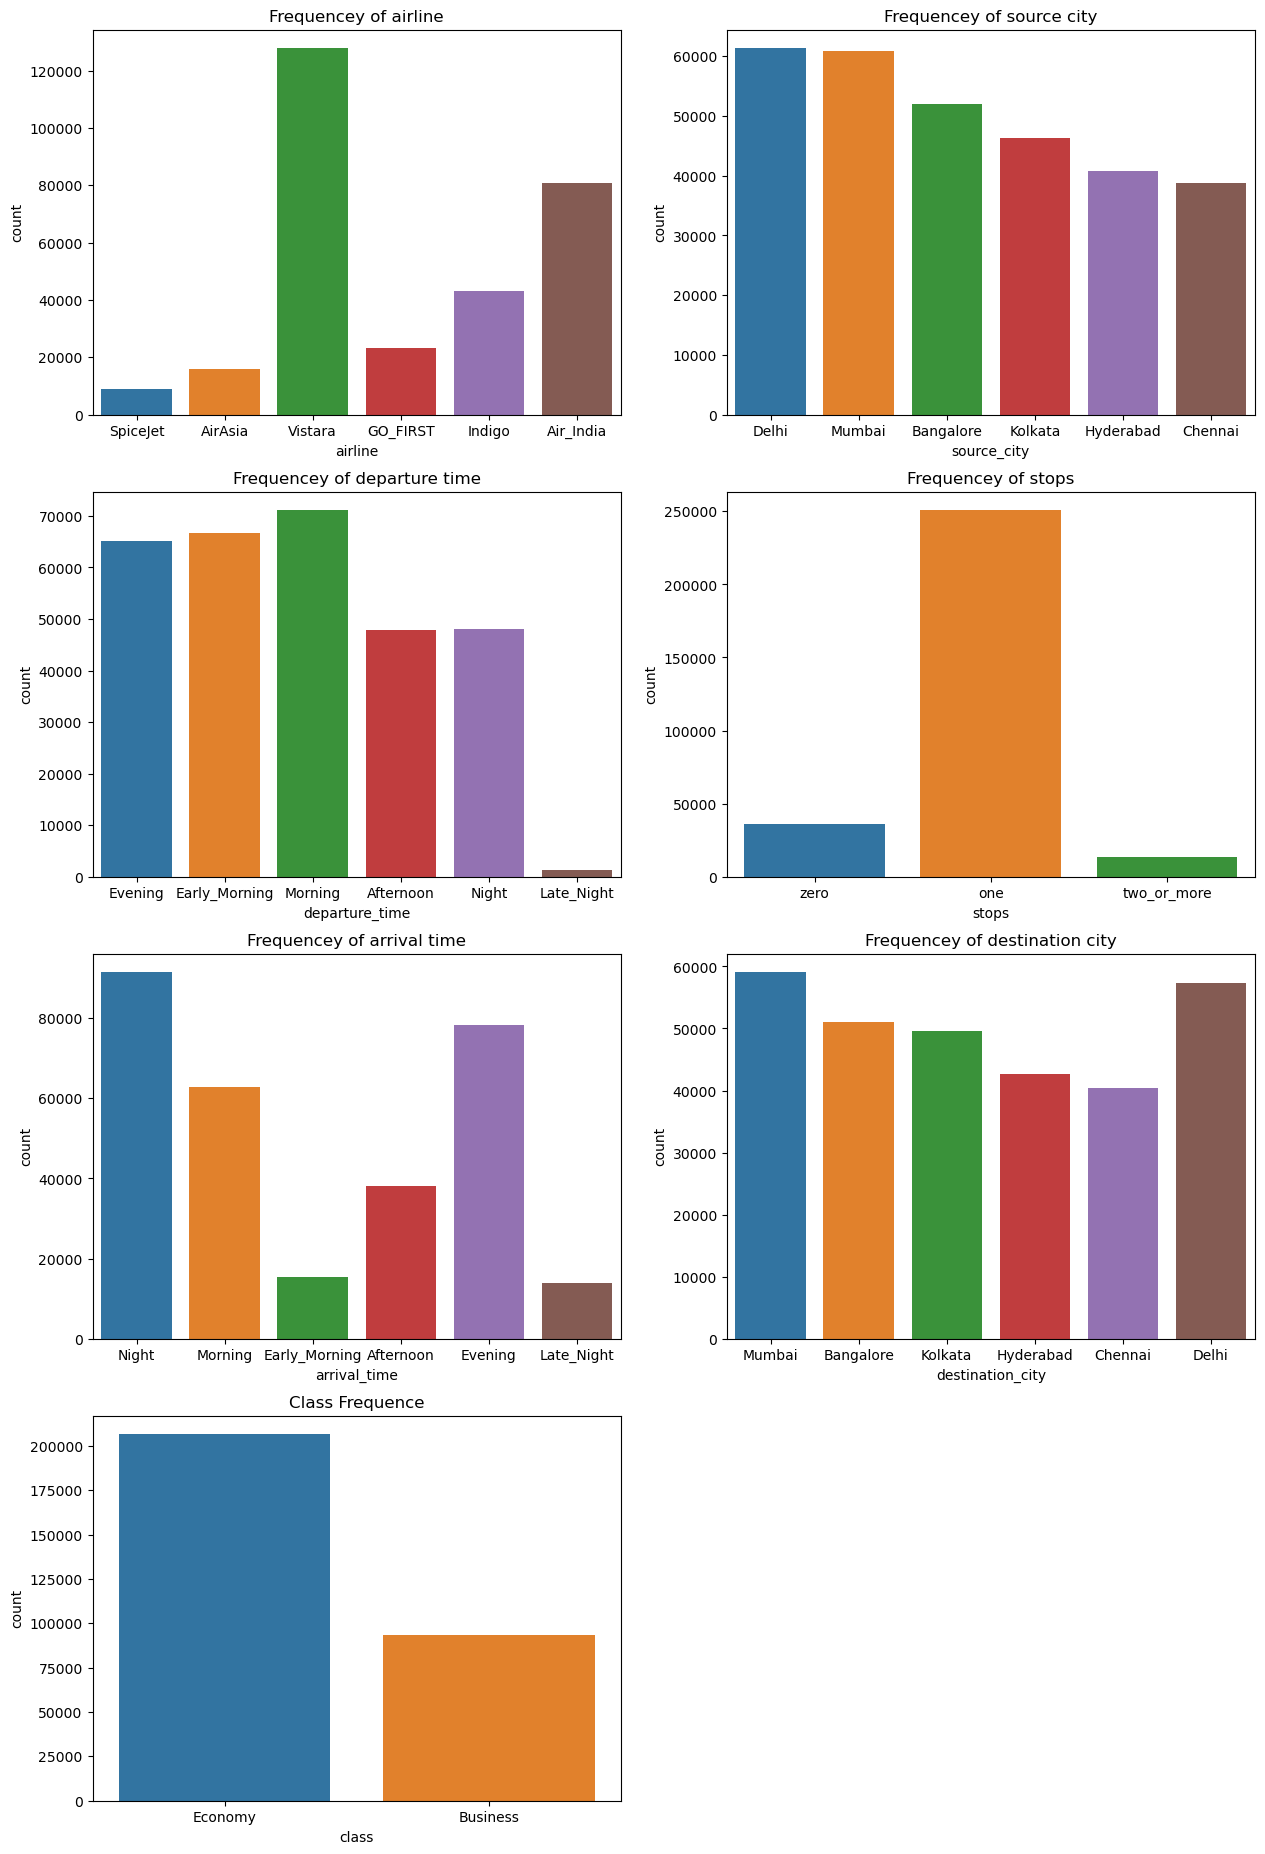

In [27]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'])
plt.title('Frequencey of airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'])
plt.title('Frequencey of source city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'])
plt.title('Frequencey of departure time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'])
plt.title('Frequencey of stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'])
plt.title('Frequencey of arrival time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'])
plt.title('Frequencey of destination city')

plt.subplot(4,2,7)
sns.countplot(x=df['class'])
plt.title('Class Frequence')

plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] = le.fit_transform((df['airline']))
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [29]:
df['flight']

0         SG-8709
1         SG-8157
2          I5-764
3          UK-995
4          UK-963
           ...   
300148     UK-822
300149     UK-826
300150     UK-832
300151     UK-828
300152     UK-822
Name: flight, Length: 300153, dtype: object

C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\439454894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


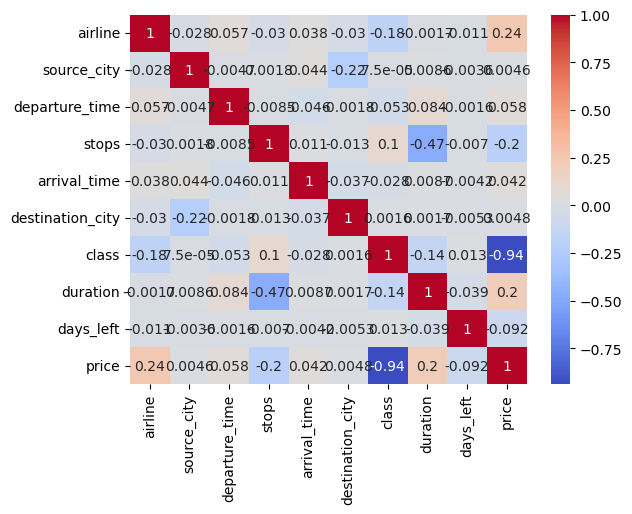

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [43]:
df.drop(columns=['flight'], inplace=True)
from statsmodels.stats.outliers_influence import  variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [44]:
x = df.drop(columns=['price'])
y = df['price']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9045526175497736


In [49]:
deffrence = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_value', 'Predict_value'])
deffrence

,Actual_value,Predict_value
0,7366.0,4572.477222
1,64831.0,52809.226907
2,6195.0,7857.626650
3,60160.0,56096.253996
4,6578.0,6656.438105
...,...,...
60026,5026.0,5820.248216
60027,3001.0,486.438325
60028,6734.0,5837.956605
60029,5082.0,-1555.511279


In [50]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

4627.355215760295

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.4361448314713314

In [52]:
metrics.mean_squared_error(y_test, y_pred)

49201433.71164046

In [53]:
np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

68.02466623042186

C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\4123853885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='actual')
C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\4123853885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predict')


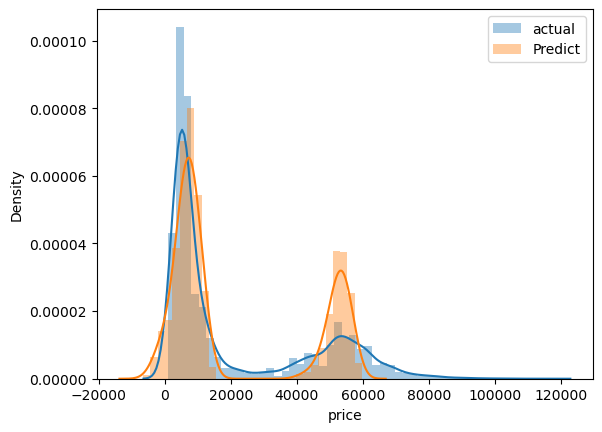

In [55]:
sns.distplot(y_test, label='actual')
sns.distplot(y_pred, label='Predict')
plt.legend()

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [58]:
y_pred = tree.predict(x_test)

C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\1431316147.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual price')
C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\1431316147.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predict price')


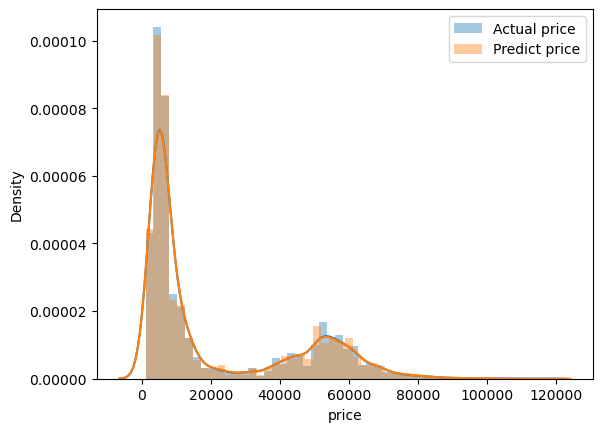

In [63]:
r2_score(y_test, y_pred)
sns.distplot(y_test,label='Actual price')
sns.distplot(y_pred,label='Predict price')
plt.legend()

In [62]:
deffrence = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_value', 'Predict_value'])
deffrence

,Actual_value,Predict_value
0,7366.0,7366.0
1,64831.0,64831.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3428.0
60028,6734.0,6734.0
60029,5082.0,5082.0


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = rf.predict(x_test)

In [65]:
r2_score(y_test, y_pred)

0.9826613301573612

C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\4166729831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual price')
C:\Users\gayatri\AppData\Local\Temp\ipykernel_940\4166729831.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predict price')


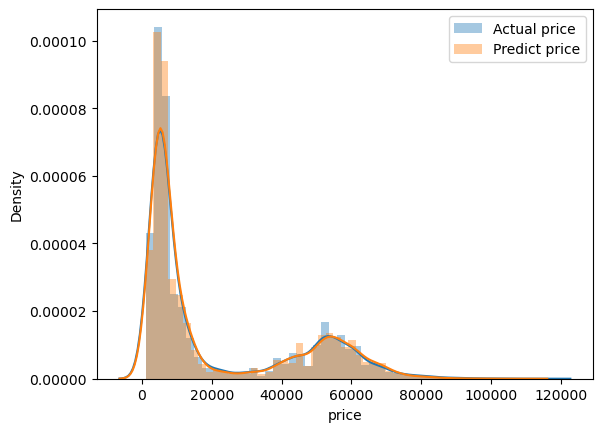

In [66]:
sns.distplot(y_test,label='Actual price')
sns.distplot(y_pred,label='Predict price')
plt.legend()

In [67]:
deffrence = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_value', 'Predict_value'])
deffrence

,Actual_value,Predict_value
0,7366.0,6499.690000
1,64831.0,67552.630000
2,6195.0,6195.000000
3,60160.0,60456.400000
4,6578.0,6535.300000
...,...,...
60026,5026.0,5163.860000
60027,3001.0,3245.961667
60028,6734.0,6564.410000
60029,5082.0,4232.140000
